<br><br><br>
<center> <h3 style="color:blue">========================================================</h3> </center>
<center> <h3 style="color:green">In the Name of Allah, the Most Beneficent, the Most Merciful</h3> </center>
<center> <h3 style="color:blue">========================================================</h3> </center>
<br><br><br>

        *----------------------------- AUTHOR_DETAILS -------------------------------*
        |                                                                            |
        |        Project Title  = Automobile Price Prediction System                 |
        |                                                                            |
        |        Author         = Mr.  Faheem Akram                                  |
        |                                                                            |
        |        Copyright      = Copyright (C) 2020 Mr. Faheem Akram                |
        |                                                                            |
        |        License        = Public Domain                                      |
        |                                                                            |
        |        Version        = 1.0                                                |
        |                                                                            |
        *----------------------------------------------------------------------------*

<br><br><br>
<center> <h2 style="color:green">-------------------- PROJECT PURPOSE --------------------</h2> </center>
<br>
<center><h3>
The main purpose of this Project is to demonstrate how the Automobile Price Prediction Problem can be treated as a Supervised Machine Learning Problem using Python and Scikit-learn Machine Learning Toolkit </h3>
<br>
<center><h3> For this Purpose, In Sha Allah, we will execute the Machine Learning Cycle </h3>
<br>
<center> <h2 style="color:green">-------------------------------------------------------------------------</h2> </center>
<br><br><br>

<h1 style="color:red">Automobile Price Prediction System – Machine Learning Cycle</h1>

## Machine Learning Cycle

### Four phases of a Machine Learning Cycle are

### Training Phase

    Build the Model using Training Data

### Testing Phase

     Evaluate the performance of Model using Testing Data

### Application Phase

     Deploy the Model in the Real-world, to predict Real-time unseen Data

### Feedback Phase

    Take Feedback from the Users and Domain Experts to improve the Model


<h1 style="color:red">Executing Machine Learning Cycle Using a Single File</h1>

### In Sha Allah, we will follow the following Steps to execute the Machine Learning Cycle Using a Single File

#### Step 1: Import Libraries

#### Step 2: Load Sample Data

#### Step 3: Understand and Pre-process Sample Data
    
    Step 3.1: Understand Sample Data
    
    Step 3.2: Pre-process Sample Data

#### Step 4: Feature Extraction 

#### Step 5: Label Encoding (Input and Output is converted in Numeric Representation)

    Step 5.1: Train the Label Encoder

    Step 5.2: Label Encode the Output

    Step 5.3: Label Encode the Input 

#### Step 6: Execute the Training Phase

    Step 6.1: Splitting Sample Data into Training Data and Testing Data 
    
    Step 6.2: Splitting Input Vectors and Outputs/Labels of Training Data
    
    Step 6.3: Train the Support Vector Regressor
    
    Step 6.4: Save the Trained Model


#### Step 7: Execute the Testing Phase 

    Step 7.1: Splitting Input Vectors and Output/Labels of Testing Data
    
    Step 7.2: Load the Saved Model
    
    Step 7.3: Evaluate the Performance of Trained Model
    
        Step 7.3.1: Make Predictions from the Model on Testing Data
    
    Step 7.4: Calculate the Mean Absolute Error.

#### Step 8: Execute the Application Phase 

    Step 8.1: Take Input from User 
    
    Step 8.2: Convert User Input into Feature Vector (Exactly Same as Feature Vectors of Sample Data)
    
    Step 8.3: Label Encoding of Feature Vector (Exactly Same as Label Encoded Feature Vectors of Sample Data)
    
    Step 8.4: Load the Saved Model
    
    Step 8.5: Model Prediction
        
        Step 8.5.1: Apply Model on the Label Encoded Feature Vector of unseen instance and return Prediction to the User


#### Step 9: Execute the Feedback Phase 

#### Step 10: Improve the Model based on Feedback

# Step 1: Import Libraries

In [401]:
# Import Libraries

import re
import scipy
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn import svm
from prettytable import PrettyTable
from astropy.table import Table, Column

# Step 2: Load Sample Data

In [402]:
# Load Sample Data

''' 
*---------------------- LOAD_SAMPLE_DATA ------------------------*
|     Function: read_csv()                                       |
|             Purpose: Read a dataset in CSV file format         |
|     Arguments:                                                 |
|             path: Path to dataset file                         |
|             dataset: Dataset file name                         |
|     Return:                                                    |
|             dataset: Dataset in DataFrame format               |
*----------------------------------------------------------------*
'''
 
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

sample_data = pd.read_csv(link, names = headers)

# Step 3: Understand and Pre-process Sample Data

## Step 3.1: Understand Sample Data

In [403]:
# Understand Sample Data

print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(sample_data.columns)

print("\n\nNumber of Instances in Sample Data:",sample_data["symboling"].count())
print("========================================\n")



Attributes in Sample Data:

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


Number of Instances in Sample Data: 205



## Step 3.2: Pre-process Sample Data
    o	Preprocessing needs to be Performed 

### 3.2.1 Replace missing values with "Nan"

In [404]:
sample_data.replace("?", np.nan, inplace = True)
sample_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Check missing values by using function isnull()

In [405]:
missing_data = sample_data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Column wise missing values:

In [406]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

### There are several ways to handle the missing values in data
        o Delete row
        o Drop Column
        o add value by taking mean of that column.

### Replace Nan with mean values.

In [407]:
#Normalized-losses column

avg_norm_loss = sample_data["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
sample_data["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)

Average of normalized-losses: 122.0


In [408]:
#Bore Column
avg_bore = sample_data["bore"].astype("float").mean(axis=0)
print("Average of Bore Values:",avg_bore)
sample_data["bore"].replace(np.nan,avg_bore,inplace=True)

Average of Bore Values: 3.3297512437810943


In [409]:
#Stroke Column
avg_stroke = sample_data["stroke"].astype("float").mean(axis=0)
print("Average of Stroke Values:",avg_bore)
sample_data["stroke"].replace(np.nan,avg_stroke,inplace = True)

Average of Stroke Values: 3.3297512437810943


In [410]:
#Horesepower column
avg_horsepower = sample_data['horsepower'].astype("float").mean(axis=0)
print("Average horsepower:", avg_horsepower)
sample_data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [411]:
#peak-rpm column
avg_peakrpm=sample_data['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
sample_data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [412]:
#num--of-doors column
sample_data['num-of-doors'].value_counts()
sample_data['num-of-doors'].value_counts().idxmax()
sample_data['num-of-doors'].replace(np.nan,"four",inplace=True)

### For output column we can't take dummy values.

In [413]:
# simply drop whole row with NaN in "price" column
sample_data.dropna(subset=["price"],axis=0,inplace=True)
# reset index, because we droped two rows
sample_data.reset_index(drop=True,inplace=True)

In [414]:
sample_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct data type:
 Some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [415]:
print(sample_data.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [416]:
sample_data[["price"]] = sample_data[["price"]].astype("float")

# Step 4: Feature Extraction
    o	Feature Extraction needs to be Performed
we will check some weak features here.

In [417]:
sample_data[["symboling", "price"]].corr()

,symboling,price
symboling,1.000000,-0.082391
price,-0.082391,1.000000


In [418]:
sample_data[["normalized-losses", "price"]].corr()

,price
price,1.0


In [419]:
# Drop columns:
sample_data.drop(['length','make','symboling','normalized-losses','bore','compression-ratio','peak-rpm','stroke','fuel-system','aspiration','num-of-doors','width','height','wheel-base','engine-size','curb-weight','engine-location'],axis=1,inplace=True)

# Step 5: Label Encoding the Sample Data (Input and Output is converted in Numeric Representation)

## Step 5.1: Train the Label Encoder
     o  Some Columns of dataset is not in numeric Representation.
     o  Therefore, we will Label Encode the Sample Data.

In [420]:
# Train the Label Encoder

''' 
*------------------ TRAIN_LABEL_ENCODER --------------------*
|        Function: Fit()                                    |
|              Purpose: Fit or Train the Label Encoder      |
|        Arguments:                                         |
|               Labels: Target Values                       |
|        Return:                                            |
|               Instance: Returns an instance of self       |
*-----------------------------------------------------------*
''' 

# Labels
fuel_type=pd.DataFrame({"fuel_type":["diesel", "gas"]})
body_style = pd.DataFrame({"body_style":["hardtop", "wagon", "sedan", "hatchback", "convertible"]})
drive_wheels = pd.DataFrame({"drive_wheels":["4wd", "fwd", "rwd"]})
engine_type = pd.DataFrame({"engine_type":["dohc", "dohcv", "l", "ohc", "ohcf", "ohcv", "rotor"]})
num_of_cylinders = pd.DataFrame({"num_of_cylinders":["eight", "five", "four", "six", "three", "twelve", "two"]})

# Initialize the Label Encoders

fuel_type_label_encoder = LabelEncoder()
body_style_label_encoder = LabelEncoder()
drive_wheels_label_encoder = LabelEncoder()
engine_type_label_encoder = LabelEncoder()
num_of_cylinders_label_encoder = LabelEncoder()

# Train the Label Encoders

fuel_type_label_encoder.fit(np.ravel(fuel_type))
body_style_label_encoder.fit(np.ravel(body_style))
drive_wheels_label_encoder.fit(np.ravel(drive_wheels))
engine_type_label_encoder.fit(np.ravel(engine_type))
num_of_cylinders_label_encoder.fit(np.ravel(num_of_cylinders))

LabelEncoder()

## Step 5.2: Label Encode the Output
     o  As Output is already in Numeric Representation.
     o  Therefore, we will not Label Encode the Output.

## Step 5.3: Label Encode the Input

In [421]:
# Label Encoding of the Input

''' 
*------------------- LABEL_ENCODE_INPUT --------------------*
|        Function: Transform()                              |
|              Purpose: Transform Input (Categorical)       |
|                          into Numerical Representation    |
|        Arguments:                                         |
|              Attribute: Target values                     |
|        Return:                                            |
|              Attribute: Numerical Representation          |
*-----------------------------------------------------------*
'''
sample_data_encoded_input = sample_data.copy()
original_sample_data = sample_data.copy()

# Transform Input Attributes into Numerical Representation

sample_data_encoded_input["encoded_fuel_type"] = fuel_type_label_encoder.transform(sample_data_encoded_input['fuel-type'])


sample_data_encoded_input["encoded_body_style"] = body_style_label_encoder.transform(sample_data_encoded_input['body-style'])

sample_data_encoded_input["encoded_drive_wheels"] = drive_wheels_label_encoder.transform(sample_data_encoded_input['drive-wheels'])


sample_data_encoded_input["encoded_engine_type"] = engine_type_label_encoder.transform(sample_data_encoded_input['engine-type'])

sample_data_encoded_input["encoded_num_of_cylinders"] = num_of_cylinders_label_encoder.transform(sample_data_encoded_input['num-of-cylinders'])


In [422]:
sample_data[["fuel-type","body-style",
         "drive-wheels","engine-type",
         "num-of-cylinders"]] = sample_data_encoded_input[["encoded_fuel_type","encoded_body_style",
         "encoded_drive_wheels","encoded_engine_type",
         "encoded_num_of_cylinders"]]

(41, 42)

# Step 6: Execute the Training Phase 

## Step 6.1: Splitting Sample Data into Training Data and Testing Data

In [423]:
# Splitting Sample Data into Training Data and Testing Data

''' 
*------------------- SPLIT_SAMPLE_DATA ---------------------*
|        Function: train_test_split()                       |
|              Purpose: Split arrays or matrices into       |
|                       random train and test subsets       |
|        Arguments:                                         |
|              arrays: sequence of indexables               |
|              test_size: float or int                      |
|        Return:                                            |
|              splitting: list                              |
*-----------------------------------------------------------*
'''

training_data, testing_data = train_test_split( sample_data , test_size=0.2 , random_state=0 , shuffle = True)

# Save the Training and Testing Data into CSV File 

training_data.to_csv(r'training-data.csv', index = False, header = True)
testing_data.to_csv(r'testing-data.csv', index = False, header = True)

# print Training and Testing Data

print("\n\nTraining Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(training_data)
print("\n\nTesting Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(testing_data)

        1            3                 2   
69           1           0             2            5                 0   
49           1           2             1            3                 2   
48           1           2             1            3                 2   
85           1           3             1            3                 2   
13           1           3             2            3                 3   
161          1           3             2            0                 2   
23           1           2             1            3                 2   
186          1           2             1            3                 2   
135          1           2             1            4                 2   
20           1           2             1            3                 2   
15           1           3             2            3                 3   
78           1           2             1            3                 2   
104          1           3             2            2   

## 6.2: Splitting Input Vectors and Outputs / Labels of Training Data

In [424]:
# Splitting Input Vectors and Outputs / Labels of Training Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: drop()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''


y_train=training_data.price

training_data.drop('price',axis=1,inplace=True)

print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
print(training_data)
print("\n\nOutputs/Labels of Training Data:")
print("================================\n")
print(y_train)

 1            3                 2   
149          1           4             1            3                 2   
24           1           3             1            3                 2   
30           1           2             1            3                 2   
160          1           2             2            3                 2   
40           1           3             1            3                 2   
56           1           2             1            3                 2   
131          1           3             1            3                 2   
96           1           2             1            3                 2   
181          1           3             1            3                 2   
19           1           3             1            3                 2   
153          1           2             1            3                 2   
92           1           2             1            3                 2   
54           1           2             2            6          

## 6.3: Train the Support Vector Regressor

In [425]:
# Train the Support Vector Regressor

''' 
*--------------- TRAIN_SUPPORT_VECTOR_REGRESSOR  ------------------*
|       Function = svm.SVC()                                        |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''
print("\n\nTraining the Support Vector Regressor on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
svr_model =svm.SVC(gamma='auto',random_state=0)
svr_model.fit(training_data,y_train)
print(svr_model)



Training the Support Vector Regressor on Training Data


Parameters and their values:

SVC(gamma='auto', random_state=0)


## Step 6.4: Save the Trained Models

In [426]:
# Save the Trained Models

''' 
*--------------------- SAVE_THE_TRAINED_MODELS --------------------*
|        Function: dump()                                          |
|             Purpose: Save the Trained Model on your Hard Disk    |
|        Arguments:                                                |
|             Model: Model Objects                                 |
|        Return:                                                   |
|             File: Trained Model will be Saved on Hard Disk       |
*------------------------------------------------------------------* 
'''

# Save the Models in a Pkl File

pickle.dump(svr_model, open('svr_trained_model.pkl', 'wb'))

# Step 7: Execute the Testing Phase 

## Step 7.1: Splitting Input Vectors and Outputs / Labels of Testing Data

In [427]:
# Splitting Input Vectors and Outputs/Labels of Testing Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: drop()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''
y_test = testing_data.price
testing_data.drop('price',axis=1,inplace=True)

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")

print(testing_data)

print("\n\nOutputs/Labels of Testing Data:")
print("==============================\n")

print(y_test)



Inputs Vectors (Feature Vectors) of Testing Data:

     fuel-type  body-style  drive-wheels  engine-type  num-of-cylinders  \
18           1           2             1            3                 2   
170          0           3             1            3                 2   
107          0           4             2            2                 2   
98           1           3             1            5                 3   
177          1           4             2            0                 3   
182          1           3             1            3                 2   
5            1           3             1            3                 1   
146          1           2             1            3                 2   
12           1           3             2            3                 3   
152          1           3             1            3                 2   
61           1           2             1            3                 2   
125          1           0             2       

## Step 7.2: Load the Saved Model

In [428]:
# Load the Saved Model

''' 
*------------------- LOAD_SAVED_MODEL --------------------------*
|         Function: load()                                      |
|               Purpose: Method to Load Previously Saved Model  |
|         Arguments:                                            |
|               Model: Trained Model                            |
|         Return:                                               |
|               File: Saved Model will be Loaded in Memory      |
*---------------------------------------------------------------*
'''

# Load the Saved Model

model = pickle.load(open('svr_trained_model.pkl', 'rb'))

## Step 7.3: Evaluate the Machine Learning Model
### Step 7.3.1: Make Predictions with the Trained Models on Testing Data

In [429]:
# Evaluate the Machine Learning Model

''' 
*--------------------- EVALUATE_MACHINE_LEARNING_MODEL ----------------------*
|       Function: Predict()                                                  |
|             Purpose: Make a Prediction using Algorithm on Test Data        |
|       Arguments:                                                           |
|            Testing Data: Provide Test data to the Trained Model            |
|       Return:                                                              |
|            Predictions: Model return Predictions                           |
*----------------------------------------------------------------------------* 
'''

# Provide Test data to the Trained Model

y_pred=svr_model.predict(testing_data)
actual_data=np.array(y_test)
for i in range(len(y_pred)):
    expl=((actual_data[i]-y_pred[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f},Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i],y_pred[i],expl))



Actual Value $6,295.00,Predicted value $6,575.00 (%-4.45)
Actual Value $10,698.00,Predicted value $7,295.00 (%31.81)
Actual Value $13,860.00,Predicted value $7,775.00 (%43.90)
Actual Value $13,499.00,Predicted value $14,399.00 (%-6.67)
Actual Value $15,750.00,Predicted value $15,690.00 (%0.38)
Actual Value $8,495.00,Predicted value $8,845.00 (%-4.12)
Actual Value $15,250.00,Predicted value $17,710.00 (%-16.13)
Actual Value $5,348.00,Predicted value $7,775.00 (%-45.38)
Actual Value $21,105.00,Predicted value $20,970.00 (%0.64)
Actual Value $6,938.00,Predicted value $7,609.00 (%-9.67)
Actual Value $11,245.00,Predicted value $8,845.00 (%21.34)
Actual Value $37,028.00,Predicted value $34,028.00 (%8.10)
Actual Value $7,995.00,Predicted value $7,775.00 (%2.75)
Actual Value $7,898.00,Predicted value $7,775.00 (%1.56)
Actual Value $14,869.00,Predicted value $14,489.00 (%2.56)
Actual Value $18,920.00,Predicted value $17,710.00 (%6.40)
Actual Value $7,129.00,Predicted value $7,295.00 (%-2.33)
Ac

## Step 7.4: Calculate the r2 score

In [430]:
# Calculate the r2_score error

''' 
/*------------------------ CALCULATE_ROOT_MEAN_SQUARE_ERROR -----------------*
|          Function: r2_score()                              |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                r2_score                               |
*----------------------------------------------------------------------*
'''

r_square=r2_score(y_test,y_pred)*100.0  #in LinearRegression not exist accuracy exist the r2_square to calc diff**2 between predict and actual 
r_train=r2_score(y_train,svr_model.predict(training_data))*100.0
print('Accuracy of Test,Predict  Data  is %{:,.2f}'.format(r_square))
print('Accuracy of Train Data is %{:,.2f}'.format(r_train))

Accuracy of Test,Predict  Data  is %73.75
Accuracy of Train Data is %96.18


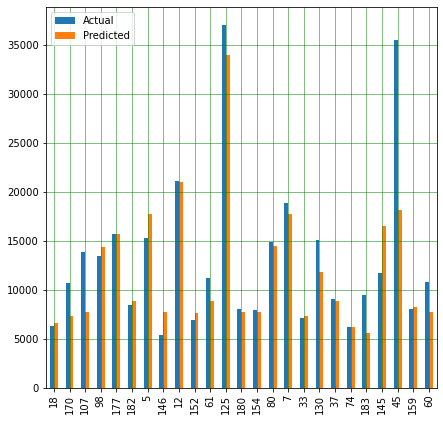

In [431]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Repeating Step 6 and 7 by using other methods and calssifier to get different values of acuracy.

### Training and Testing

In [432]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

sample_data = pd.read_csv(link, names = headers)

# Drop columns
sample_data.drop(['length','make','symboling','normalized-losses','bore','compression-ratio','peak-rpm','stroke','fuel-system','aspiration','num-of-doors','width','height','wheel-base','engine-size','curb-weight','engine-location'],axis=1,inplace=True)

#Handling missing values
sample_data.replace("?", np.nan, inplace = True)
avg_horsepower = sample_data['horsepower'].astype("float").mean(axis=0)
sample_data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

# simply drop whole row with NaN in "price" column
sample_data.dropna(subset=["price"],axis=0,inplace=True)

# reset index, because we droped two rows
sample_data.reset_index(drop=True,inplace=True)

#Label Encoding
col=['num-of-cylinders','body-style','drive-wheels','engine-type',
     'fuel-type']
sample_data=pd.get_dummies(sample_data,columns=col,drop_first=True)

# Change data type
sample_data[["price"]] = sample_data[["price"]].astype("float")

# Training
train,test=train_test_split(sample_data,test_size=0.2,random_state=0)

y_train=train.price
y_test=test.price
train.drop('price',axis=1,inplace=True)
test.drop('price',axis=1,inplace=True)

regressor=LinearRegression()
regressor.fit(train,y_train)

y_pred=regressor.predict(test)

In [433]:
actual_data=np.array(y_test)
for i in range(len(y_pred)):
    expl=((actual_data[i]-y_pred[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f},Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i],y_pred[i],expl))

Actual Value $6,295.00,Predicted value $5,048.50 (%19.80)
Actual Value $10,698.00,Predicted value $11,939.87 (%-11.61)
Actual Value $13,860.00,Predicted value $16,692.21 (%-20.43)
Actual Value $13,499.00,Predicted value $15,740.37 (%-16.60)
Actual Value $15,750.00,Predicted value $21,811.85 (%-38.49)
Actual Value $8,495.00,Predicted value $9,540.03 (%-12.30)
Actual Value $15,250.00,Predicted value $19,642.48 (%-28.80)
Actual Value $5,348.00,Predicted value $4,447.86 (%16.83)
Actual Value $21,105.00,Predicted value $22,903.75 (%-8.52)
Actual Value $6,938.00,Predicted value $7,775.43 (%-12.07)
Actual Value $11,245.00,Predicted value $7,924.73 (%29.53)
Actual Value $37,028.00,Predicted value $33,647.92 (%9.13)
Actual Value $7,995.00,Predicted value $10,247.53 (%-28.17)
Actual Value $7,898.00,Predicted value $9,688.97 (%-22.68)
Actual Value $14,869.00,Predicted value $14,326.53 (%3.65)
Actual Value $18,920.00,Predicted value $19,401.60 (%-2.55)
Actual Value $7,129.00,Predicted value $6,345

## Here, we will get different Accuracy

In [434]:
r_square=r2_score(y_test,y_pred)*100.0  #in LinearRegression not exist accuracy exist the r2_square to calc diff**2 between predict and actual 
r_train=r2_score(y_train,regressor.predict(train))*100.0
print('Accuracy of Test,Predict  Data  is %{:,.2f}'.format(r_square))
print('Accuracy of Train Data is %{:,.2f}'.format(r_train))

Accuracy of Test,Predict  Data  is %85.74
Accuracy of Train Data is %89.76


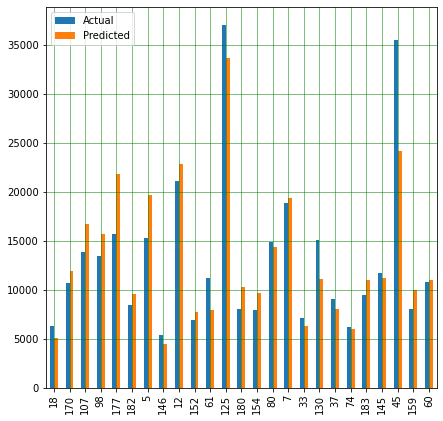

In [435]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [436]:
sample_data.columns

Index(['horsepower', 'city-mpg', 'highway-mpg', 'price',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'num-of-cylinders_two', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'fuel-type_gas'],
      dtype='object')

# Step 8: Execute the Application Phase

## Step 8.1: Take Input from User

In [437]:
# Take Input from User

''' 
*---------------- TAKE_USER_INPUT ----------------*
'''

fuel_type_input = input("\nPlease enter Fuel Type : ").strip()
horsepower_input = input("\nPlease enter Horsepower : ").strip()
num_of_cylinders_input = input("\nPlease enter Num of Cylinders : ").strip()
city_mpg_input = input("\nPlease enter City MPG : ").strip()
highway_mpg_input = input("\nPlease enter Highway MPG : ").strip()
engine_type_input = input("\nPlease enter Engine Type : ").strip()
body_style_input = input("\nPlease enter Body Style : ").strip()
drive_wheels_input = input("\nPlease enter Drive Wheels : ").strip()

## Step 8.2: Convert User Input into Feature Vector (Exactly Same as Feature Vectors of Sample Data)

In [438]:
# Convert User Input into Feature Vector

user_input = pd.DataFrame({ 'fuel-type': [fuel_type_input],'engine-type': [engine_type_input],'drive-wheels': [drive_wheels_input],'num-of-cylinders': [num_of_cylinders_input],'horsepower': [horsepower_input],'city-mpg': [city_mpg_input],'highway-mpg': [highway_mpg_input],'body-style': [body_style_input]})

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

  fuel-type engine-type drive-wheels num-of-cylinders horsepower city-mpg  \
0                                                                           

  highway-mpg body-style  
0                         


## Step 8.3: Label Encoding of Feature Vector (Exactly Same as Label Encoded Feature Vectors of Sample Data)
    o	As Input of Unseen Instance is in Numeric Representation.
    o	Therefore, we will Label Encode the Input of Unseen Instance.

In [439]:
unseen_data_features = user_input.copy()
unseen_data_features["fuel-type"] = fuel_type_label_encoder.transform(user_input['fuel-type'])
unseen_data_features["body-style"] = body_style_label_encoder.transform(user_input['body-style'])
unseen_data_features["drive-wheels"] = drive_wheels_label_encoder.transform(user_input['drive-wheels'])
unseen_data_features["engine-type"] = engine_type_label_encoder.transform(user_input['engine-type'])
unseen_data_features["num-of-cylinders"] = num_of_cylinders_label_encoder.transform(user_input['num-of-cylinders'])
unseen_data_features

ValueError: y contains previously unseen labels: ''

## Step 8.4: Load the Train Model

In [392]:
# Load the Saved Model

''' 
*----------------------- LOAD_SAVED_MODEL --------------------------*
|         Function: load()                                          |
|             Purpose: Method to Load Previously Saved Model        |
|         Arguments:                                                |
|               Model: Trained Model                                |
|         Return:                                                   |
|               File: Saved Model will be Loaded in Memory          |
*-------------------------------------------------------------------*
'''

# Load the Saved Model

model = pickle.load(open('svr_trained_model.pkl', 'rb'))

## Step 8.5: Model Prediction
### Step 8.5.1: Apply Model on the Label Encoded Feature Vector of unseen instance and return Prediction to the User

In [393]:
# Prediction of Unseen Instance

''' 
*----------------------------  MODEL_PREDICTION --------------------------*
|           Function: predict()                                           |
|                 Purpose: Use Trained Model to Predict the Output        |
|                          of Unseen Instances                            |
|           Arguments:                                                    |
|                 User Data: Label Encoded Feature Vector of              |
|                            Unseen Instances                             |
|           Return:                                                       |
|                 Price                                                     |
*-------------------------------------------------------------------------*
'''

# Make a Prediction on Unseen Data

predicted_price = model.predict(unseen_data_features)

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction in $**       ",predicted_price)
print(pretty_table)

+------------------------------------+
|        ** Prediction in $**        |
+------------------------------------+
|               7775.0               |
+------------------------------------+


# Step 9: Execute the Feedback Phase
## A Two-Step Process
### Step 01: After some time, take Feedback from
    o	Domain Experts and Users on deployed Automobile Price Prediction System
### Step 02: Make a List of Possible Improvements based on Feedback received

# Step 10: Improve Model based on Feedback
### There is Always Room for Improvement
### Based on Feedback from Domain Experts and Users
    o	Improve your Model

<br><br><br>
<center> <h3 style="color:blue">==========================================================</h3> </center>
<center> <h3 style="color:green">JAZAK ALLAH KHAIR</h3> 
<center> <h3 style="color:blue">==========================================================</h3> </center>
<br><br><br>